In [161]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pandas as pd

# Standard Curve 

In [162]:
#Model for standard curve
def linear_model(x, a, b):
    return a*x + b

In [163]:
#Import data from excel into pandas dataframe:
std = pd.read_excel('24.10.31_stand_curve_TPA.xlsx', #name of excel file
                    sheet_name= 'Sheet2', #name of sheet
                    skiprows = 27, nrows = 7, #skip rows until, #number of rows to read
                    header = None) #do not use the first row as header
std

,0,1,2,3,4,5,6,7,8
0,B,1.8980,1.8820,1.8764,NaN,NaN,NaN,NaN,NaN
1,C,1.5465,1.5371,1.5283,NaN,NaN,NaN,NaN,NaN
2,D,1.1833,1.1799,1.1688,NaN,NaN,NaN,NaN,NaN
3,E,0.7792,0.8715,0.8463,NaN,NaN,NaN,NaN,NaN
4,F,0.4274,0.4693,0.4756,NaN,NaN,NaN,NaN,NaN
5,G,0.3128,0.2884,0.2927,NaN,NaN,NaN,NaN,NaN
6,H,0.1000,0.0964,0.1000,NaN,NaN,NaN,NaN,NaN


In [164]:
#Add concentrations to df:
conc = [0, 15, 30, 60, 90, 120, 150] #uM (TPA concentrations for std curve)
conc.reverse() #Reverse items in conc
std['Conc'] = conc

#Add averages to df:
std['Average'] = std.iloc[:, 1:4].mean(axis=1) #iloc[rows, columns] (all rows, columns with index 1 to 3)
std['Average_corr'] = std['Average']-std.iloc[6]['Average'] #blank corrected values
std['stdev'] = std.iloc[:, 1:4].std(axis=1)

#What to plot?
x = std['Conc']
y = std['Average_corr']
std

,0,1,2,3,4,5,6,7,8,Conc,Average,Average_corr,stdev
0,B,1.8980,1.8820,1.8764,NaN,NaN,NaN,NaN,NaN,150,1.885467,1.786667,0.011210
1,C,1.5465,1.5371,1.5283,NaN,NaN,NaN,NaN,NaN,120,1.537300,1.438500,0.009102
2,D,1.1833,1.1799,1.1688,NaN,NaN,NaN,NaN,NaN,90,1.177333,1.078533,0.007583
3,E,0.7792,0.8715,0.8463,NaN,NaN,NaN,NaN,NaN,60,0.832333,0.733533,0.047709
4,F,0.4274,0.4693,0.4756,NaN,NaN,NaN,NaN,NaN,30,0.457433,0.358633,0.026200
5,G,0.3128,0.2884,0.2927,NaN,NaN,NaN,NaN,NaN,15,0.297967,0.199167,0.013025
6,H,0.1000,0.0964,0.1000,NaN,NaN,NaN,NaN,NaN,0,0.098800,0.000000,0.002078


In [165]:
#Fit the data points to the linear model:
popt, pcov = curve_fit(linear_model, x, y) #popt = fitted parameters [a, b], pcov = covariance matrix.

#Get the fitted values:
y_fit = linear_model(x, *popt)
a = popt[0]
b = popt[1]

#Compute R^2, coefficient of determination:
residuals = y - y_fit  #calculate residuals
tss = np.sum((y-np.mean(y))**2) #calculate total sum of squares
rss = np.sum(residuals**2) #calculate residual sum of squares
r_2 = 1 - (rss/tss) #calculate R^2 

In [166]:
#Print fitted values:
print('a = ' + str(a))
print('b = ' + str(b))
print('R^2 = ' + str(r_2))

a = 0.011880432272095424
b = 0.010090332326256841
R^2 = 0.9998371603394429


Text(100, 0.5, 'R = 0.9998')

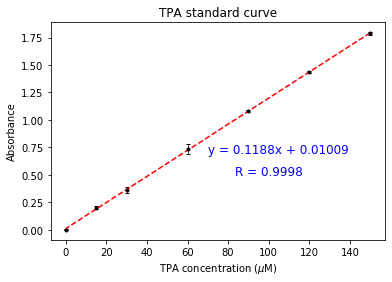

In [167]:
#Plot standard curve:
plt.errorbar(x, y, yerr = std['stdev'], fmt = 'k.', elinewidth = 0.7, capsize = 2) #Measured data
plt.plot(x, y_fit, 'r--') #Fitted data
plt.xlabel('TPA concentration ($\mu$M)')
plt.ylabel('Absorbance')
plt.title('TPA standard curve')
plt.text(105, 0.7, 'y = 0.1188x + 0.01009', fontsize=12, color='blue', ha='center')
plt.text(100, 0.5, 'R = 0.9998', fontsize=12, color='blue', ha='center')

# Obtain data

In [168]:
def read_excel(filename, sheetname):
    df = pd.read_excel(filename, #name of excel file
                        sheet_name= sheetname, #name of sheet
                        skiprows = 27, nrows = 8, #skip rows until, #number of rows to read
                        header = None) #do not use the first row as header
    return df

In [169]:
concentrations = [0, 0.2, 0.4, 0.6, 0.8, 1, 1.2, 1.4] #uM
times = [0, 40, 70, 125, 186] #min (change for each assay!!!!)

conc_PET = 10 #g/L
vol = 250*10**(-6) #L
mass_PET = conc_PET*vol

filename = '24.10.31_wt_FsC_0h.xlsx' #Specify for each assay !!!!
sheetnames = ['Sheet2', 'Sheet3', 'Sheet4', 'Sheet5', 'Sheet8'] # !!!!

#Import data:
raw_data = []  #list for collecting dataframes for each time

for sheet in sheetnames:  #For every time point,
    df = read_excel(filename, sheet)   #Read the excel file, 

    #should calculate TPA eq before Averages
    df['Average'] = df.iloc[:, 1:4].mean(axis=1) #iloc[rows, columns] (all rows, columns with index 1 to 3)  #Add a column for average abs values,
    df['Average_corr'] = df['Average']-df.iloc[0]['Average'] #blank corrected values, corrected from parallell A without FsC.
    df['stdev'] = df.iloc[:, 1:4].std(axis=1)  #Add a column for standard deviations

    #Calculate TPA equivalents:
    df['conc_TPA'] = (df['Average_corr']-b)/a  #uM
    df['TPA_eq'] = df['conc_TPA']*vol/mass_PET  #umol/g PET
    
    raw_data.append(df)  #Store dataframe in this list,


In [170]:
all_y = []  #Data for all concentrations
all_stdev = [] 

for i in range(0,8):
#Get y values for one concentration
    y = []   #Data for one concentration
    for df in raw_data:
        y.append(df.loc[i]['TPA_eq'])
    all_y.append(y)

for i in range(0,8):
    std = []   
    for df in raw_data:
        std.append(df.loc[i]['stdev'])
    all_stdev.append(std)

# TPA Equivalens over Time

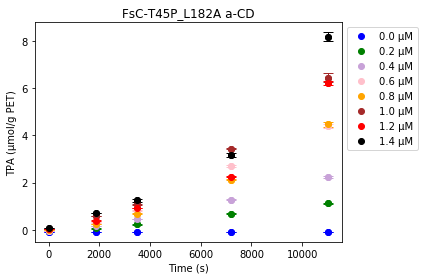

In [171]:

# Time points (adjust if needed)
x = np.array([0, 1860, 3480, 7200, 11040])

# Colors and labels
colors = ['blue', 'green', '#C8A2D8', 'pink', '#FFA500', 'brown', 'red', 'black']
concs = ['0.0 µM', '0.2 µM', '0.4 µM', '0.6 µM', '0.8 µM', '1.0 µM', '1.2 µM', '1.4 µM']

# Plot only data points + error bars
for i in range(len(all_y)):
    y = np.array(all_y[i])
    if np.any(np.isnan(y)):
        continue

    plt.plot(x, y, 'o', color=colors[i], label=concs[i])
    plt.errorbar(x, y, yerr=all_stdev[i], fmt='o', color=colors[i], elinewidth=1, capsize=5)

# Final plot styling
plt.xlabel('Time (s)')
plt.ylabel('TPA (µmol/g PET)')
plt.title('FsC-T45P_L182A a-CD')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), frameon=True)
plt.tight_layout()
plt.show()

## Secant metod:  

### Calculate blanc corrected TPAeq of all triplicates at 0h and 3h:

In [206]:

# Load Excel files
file_path_standard_curve = "24.10.31_stand_curve_TPA.xlsx"
file_path_absorbance = "24.11.06_L182A.xlsx"  # change !!!!!

# Load relevant sheets
sheet_time_0 = "Sheet5"  # Adjust based on identified correct sheet !!!!!
sheet_time_last = "Sheet9"  # Adjust based on identified correct sheet !!!!!

df_time_0 = pd.read_excel(file_path_absorbance, sheet_name=sheet_time_0, skiprows=26, usecols="A:D", nrows=8)
df_time_last = pd.read_excel(file_path_absorbance, sheet_name=sheet_time_last, skiprows=26, usecols="A:D", nrows=8)

# Rename columns for clarity
df_time_0.columns = ["Sample", "Triplicate_1", "Triplicate_2", "Triplicate_3"]
df_time_last.columns = ["Sample", "Triplicate_1", "Triplicate_2", "Triplicate_3"]

# Convert all data to numeric, forcing errors to NaN
df_time_0.iloc[:, 1:] = df_time_0.iloc[:, 1:].apply(pd.to_numeric, errors='coerce')
df_time_last.iloc[:, 1:] = df_time_last.iloc[:, 1:].apply(pd.to_numeric, errors='coerce')

# Compute blank-corrected absorbance values for each triplicate
blank_0_triplicates = df_time_0.iloc[0, 1:].astype(float).values  # Convert to float
blank_last_triplicates = df_time_last.iloc[0, 1:].astype(float).values  # Convert to float

df_time_0[["BC_Triplicate_1", "BC_Triplicate_2", "BC_Triplicate_3"]] = df_time_0.iloc[:, 1:4].subtract(blank_0_triplicates, axis=1)
df_time_last[["BC_Triplicate_1", "BC_Triplicate_2", "BC_Triplicate_3"]] = df_time_last.iloc[:, 1:4].subtract(blank_last_triplicates, axis=1)

# Constants for transformation to TPA (umol/g PET)
conc_PET = 10  # g/L
vol = 250 * 10**(-6)  # L
mass_PET = conc_PET * vol  # g

def convert_to_tpa(od_values, a, b):
    conc_TPA = (od_values - b) / a  # uM
    return conc_TPA * vol / mass_PET  # Transform to umol/g PET

# Placeholder for calibration curve parameters (to be replaced with actual values)
a = 0.011880432272095424  # Slope of TPA curve
b = 0.010090332326256841  # Intercept of TPA curve

# Apply transformation using calibration equation
df_time_0[["TPA_Triplicate_1", "TPA_Triplicate_2", "TPA_Triplicate_3"]] = df_time_0[["BC_Triplicate_1", "BC_Triplicate_2", "BC_Triplicate_3"]].apply(lambda x: convert_to_tpa(x, a, b))
df_time_last[["TPA_Triplicate_1", "TPA_Triplicate_2", "TPA_Triplicate_3"]] = df_time_last[["BC_Triplicate_1", "BC_Triplicate_2", "BC_Triplicate_3"]].apply(lambda x: convert_to_tpa(x, a, b))

# Merge results into a single DataFrame
df_results = pd.DataFrame({
    "Sample": df_time_0["Sample"],
    "TPA_Triplicate_1_Time_0": df_time_0["TPA_Triplicate_1"],
    "TPA_Triplicate_2_Time_0": df_time_0["TPA_Triplicate_2"],
    "TPA_Triplicate_3_Time_0": df_time_0["TPA_Triplicate_3"],
    "TPA_Triplicate_1_Time_last": df_time_last["TPA_Triplicate_1"],
    "TPA_Triplicate_2_Time_last": df_time_last["TPA_Triplicate_2"],
    "TPA_Triplicate_3_Time_last": df_time_last["TPA_Triplicate_3"]
})

# Display results
df_results

,Sample,TPA_Triplicate_1_Time_0,TPA_Triplicate_2_Time_0,TPA_Triplicate_3_Time_0,TPA_Triplicate_1_Time_last,TPA_Triplicate_2_Time_last,TPA_Triplicate_3_Time_last
0,A,-0.084932,-0.084932,-0.084932,-0.084932,-0.084932,-0.084932
1,B,0.171792,0.311518,0.199569,0.984052,1.374610,1.421747
2,C,0.334244,0.250914,0.335928,2.342589,2.045462,2.516825
3,D,0.349395,0.570768,0.505955,3.084986,3.730585,3.329927
4,E,0.532049,0.427675,0.558142,4.139661,4.020137,6.197667
5,F,1.074958,0.720594,0.659148,8.406341,5.791117,5.631189
6,G,0.990786,0.808974,0.634738,6.429982,6.716167,5.490622
7,H,0.996678,0.675141,1.024455,7.727072,5.860979,8.157192


## Compute slopes (V0) using secant method

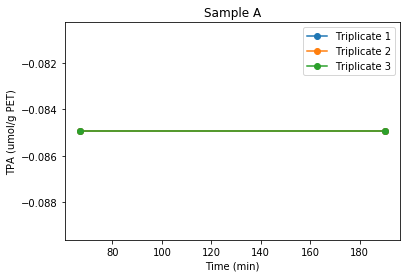

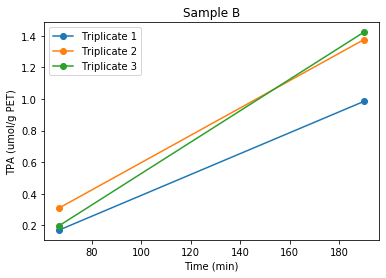

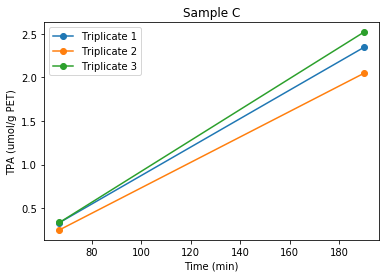

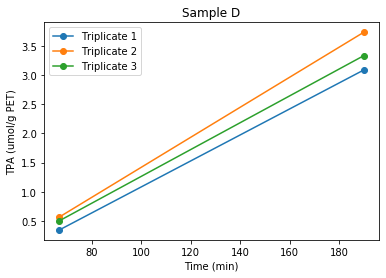

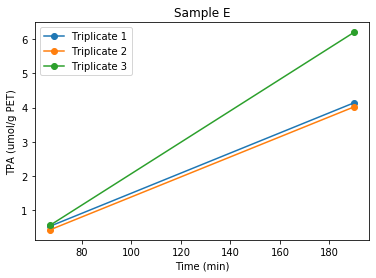

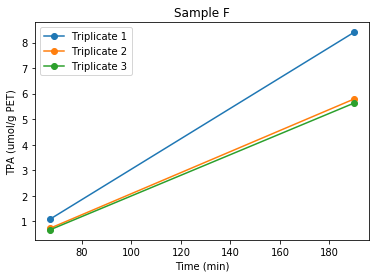

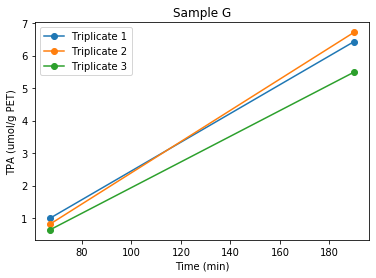

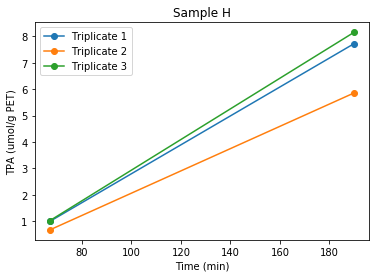

  Sample  V0_Triplicate_1  V0_Triplicate_2  V0_Triplicate_3   V0_Mean  \
0      A         0.000000         0.000000         0.000000  0.000000   
1      B         0.006604         0.008643         0.009936  0.008394   
2      C         0.016328         0.014590         0.017731  0.016216   
3      D         0.022241         0.025690         0.022959  0.023630   
4      E         0.029330         0.029207         0.045850  0.034796   
5      F         0.059605         0.041224         0.040423  0.047084   
6      G         0.044221         0.048026         0.039479  0.043909   
7      H         0.054719         0.042161         0.057990  0.051623   

   V0_Error  
0  0.000000  
1  0.001372  
2  0.001285  
3  0.001486  
4  0.007817  
5  0.008860  
6  0.003496  
7  0.006823  


In [207]:
time_points = np.array([67, 190]) # change to correct time for each cutinase variant !!!!!
slopes = (df_time_last.iloc[:, -3:].values - df_time_0.iloc[:, -3:].values) / 123  # V0 estimates, change !!!!!

# Compute error estimates (E0 error)
E0_errors = np.max(slopes, axis=1) - np.min(slopes, axis=1)

# Generate 8 graphs for each sample
for i, sample in enumerate(df_time_0["Sample"]):
    plt.figure(figsize=(6, 4))
    for j in range(3):  # Triplicates
        plt.plot(time_points, [df_time_0.iloc[i, -3+j], df_time_last.iloc[i, -3+j]], marker='o', label=f'Triplicate {j+1}')
    plt.xlabel("Time (min)")
    plt.ylabel("TPA (umol/g PET)")
    plt.title(f"Sample {sample}")
    plt.legend()
    plt.show()

# Compute mean and error estimates (E0 error)
V0_mean = np.mean(slopes, axis=1)
V0_errors = np.std(slopes, axis=1)

# Create a DataFrame for V0 outputs
V0_results = pd.DataFrame({
    "Sample": df_time_0["Sample"],
    "V0_Triplicate_1": slopes[:, 0],
    "V0_Triplicate_2": slopes[:, 1],
    "V0_Triplicate_3": slopes[:, 2],
    "V0_Mean": V0_mean,
    "V0_Error": V0_errors
})

# Print V0 results
print(V0_results)

In [208]:
V0_mean_nmol = V0_mean*1000
print(V0_mean_nmol)

[ 0.          8.39439132 16.21623073 23.62975572 34.79566415 47.08386649
 43.90859806 51.62322349]


In [209]:
V0_errors_nmol = V0_errors * 1000
V0_errors_nmol[0] = 1e-9
print(V0_errors_nmol)

[1.00000000e-09 1.37186662e+00 1.28476271e+00 1.48575753e+00
 7.81661611e+00 8.85962594e+00 3.49637956e+00 6.82256798e+00]


# Inverse Michaelis-Menten:

In [210]:
c = np.array(concentrations)

In [211]:
def inv_MM(c, Vmax, Km):
    return (Vmax*c)/(Km+c)

In [213]:
popt, pcov = curve_fit(inv_MM, c, V0_mean_nmol, sigma=V0_errors_nmol, absolute_sigma=True)

Km = popt[1]
Vmax = popt[0]
print('Km = ' + str(Km) + 'µM')
print('Vmax = ' + str(Vmax) + 'nmol g$^{-1}$ s$^{-1}$')

Km = 8.958383884390948µM
Vmax = 380.3419767006632nmol g$^{-1}$ s$^{-1}$


In [215]:
perr = np.sqrt(np.diag(pcov))  # Standard errors are the square roots of the diagonal of pcov
Vmax_err, Km_err = perr

print('Km error = ' + str(Km_err) + 'µM')
print('Vmax error= ' + str(Vmax_err) + 'nmol g$^{-1}$ s$^{-1}$')

Km error = 9.814423620461389µM
Vmax error= 385.20144308471646nmol g$^{-1}$ s$^{-1}$


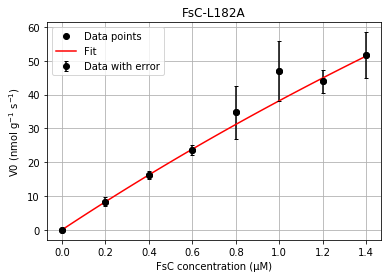

In [217]:
x_for_fit = np.linspace(0, 1.4, 100)


# Plot the data points and fit
plt.plot(c, V0_mean_nmol, 'ko', label='Data points')
plt.plot(x_for_fit, inv_MM(x_for_fit, *popt), label='Fit', color='red')

#legge på errorbars her: 
plt.errorbar(c, V0_mean_nmol, yerr=V0_errors_nmol, fmt='o', label='Data with error', color='black', capsize=2)

# Labels, title, and legend
plt.xlabel('FsC concentration (µM)')
plt.ylabel('V0 (nmol g$^{-1}$ s$^{-1}$)')
plt.title('FsC-L182A')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()
